In [1]:
from sklearn.linear_model import LogisticRegression, SGDClassifier
from sklearn.metrics import accuracy_score
from sklearn.preprocessing import PolynomialFeatures
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline

In [2]:
def plot_data(A, b, test = False):
    positive_indices = np.where(b == 1)[0]
    negative_indices = np.where(b == 0)[0]
    
    plt.scatter(A.iloc[positive_indices, 0], A.iloc[positive_indices, 1], marker='x', c= 'yellow' if test else 'green')
    plt.scatter(A.iloc[negative_indices, 0], A.iloc[negative_indices, 1], marker='+', c= 'blue' if test else 'red')
    
   # plt.show()

In [60]:
def plot_surface(est, x_1, x_2, ax=None, threshold=0.5, contourf=False):
    """Plots the decision surface of ``est`` on features ``x1`` and ``x2``. """
    xx1, xx2 = np.meshgrid(np.linspace(x_1.min(), x_1.max(), 100), 
                           np.linspace(x_2.min(), x_2.max(), 100))
    
    X_pred = np.c_[xx1.ravel(), xx2.ravel(), xx1.ravel()**2, xx1.ravel()*xx2.ravel(), xx2.ravel()**2 ]#, xx1.ravel()**3, xx2.ravel()**3]
    
    new_series = pd.DataFrame(X_pred)
    print(new_series)
    if hasattr(est, 'predict_proba'):  
        pred = est.predict_proba(X_pred)[:, 1]
        
    else:
        pred = est.predict(X_pred)
    
    new_series = pd.DataFrame(est.coef_)
    print(new_series)
    
    new_series = pd.DataFrame(pred)
    print(new_series)
        
    predictions = np.where(pred>=0.5, 1, 0).T
    count = np.count_nonzero(predictions == 1)
    print(count)
    
    
    Z = pred.reshape((100, 100))  # reshape seq to grid
    if ax is None:
        ax = plt.gca()
    ax.contour(xx1, xx2, Z, levels=[threshold], colors='black')
    ax.set_xlim((x_1.min(), x_1.max()))
    ax.set_ylim((x_2.min(), x_2.max()))
    plt.show()

In [48]:
df = pd.read_csv('testsCom.csv')
X, y = df[["test1", "test2", "test1test1", "test1test2", "test2test2"]], df['passed']

In [49]:
print(X.shape, y.shape)

(118, 5) (118,)


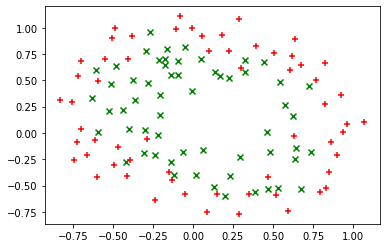

In [50]:
plot_data(X, y)

In [51]:
clf = LogisticRegression()
#clf = LogisticRegression(solver='lbfgs')
#clf = LogisticRegression(solver='lbfgs', max_iter=100000, tol=1e-10)
clf = clf.fit(X, y)

In [52]:
y_pred = clf.predict(X)
print(y_pred.shape)

(118,)


In [53]:
y_pred


array([1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 0, 0, 1, 0, 1, 1, 1, 1, 1, 1, 0, 1,
       1, 1, 1, 1, 0, 0, 1, 1, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 0, 1, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 0, 1, 1, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 1, 1, 0, 1, 0, 0, 0, 0,
       1, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 1, 1, 0, 0,
       0, 0, 0, 0, 0, 0, 1, 1], dtype=int64)

In [54]:
accuracy_score(y, y_pred)

0.8135593220338984

In [55]:
X_test = np.array([[40, 40], [60, 65]])
poly = PolynomialFeatures(2)
X_test = poly.fit_transform(X_test)
X_test = X_test[:, 1:]

In [56]:
y_test = clf.predict(X_test)

C:\Users\Admin\anaconda3\envs\py38\lib\site-packages\sklearn\base.py:450: UserWarning: X does not have valid feature names, but LogisticRegression was fitted with feature names
  warnings.warn(


In [57]:
y_test

array([0, 0], dtype=int64)

In [58]:
X_test

array([[  40.,   40., 1600., 1600., 1600.],
       [  60.,   65., 3600., 3900., 4225.]])

             0        1         2         3         4
0    -0.830070 -0.76974  0.689016  0.638938  0.592500
1    -0.810868 -0.76974  0.657507  0.624158  0.592500
2    -0.791667 -0.76974  0.626736  0.609377  0.592500
3    -0.772465 -0.76974  0.596702  0.594597  0.592500
4    -0.753263 -0.76974  0.567405  0.579817  0.592500
...        ...      ...       ...       ...       ...
9995  0.994093  1.10890  0.988221  1.102350  1.229659
9996  1.013295  1.10890  1.026766  1.123643  1.229659
9997  1.032497  1.10890  1.066049  1.144935  1.229659
9998  1.051698  1.10890  1.106069  1.166228  1.229659
9999  1.070900  1.10890  1.146827  1.187521  1.229659

[10000 rows x 5 columns]
          0         1        2         3         4
0  0.350146  0.671369 -2.78153 -0.956861 -2.390461
             0
0     0.027863
1     0.030958
2     0.034316
3     0.037949
4     0.041868
...        ...
9995  0.011533
9996  0.010233
9997  0.009060
9998  0.008004
9999  0.007056

[10000 rows x 1 columns]
4261


C:\Users\Admin\anaconda3\envs\py38\lib\site-packages\sklearn\base.py:450: UserWarning: X does not have valid feature names, but LogisticRegression was fitted with feature names
  warnings.warn(


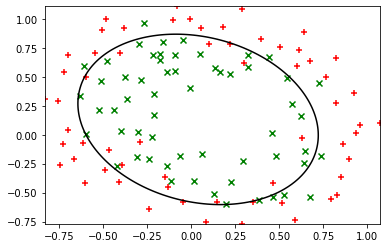

        test1     test2  test1test1  test1test2  test2test2
0   -0.092742  0.684940    0.008601   -0.063523    0.469143
1    0.051267  0.699560    0.002628    0.035864    0.489384
2   -0.213710  0.692250    0.045672   -0.147941    0.479210
3   -0.375000  0.502190    0.140625   -0.188321    0.252195
4   -0.513250  0.465640    0.263426   -0.238990    0.216821
..        ...       ...         ...         ...         ...
113 -0.720620  0.538740    0.519293   -0.388227    0.290241
114 -0.484450  0.999270    0.234692   -0.484096    0.998541
115 -0.006336  0.999270    0.000040   -0.006332    0.998541
116  0.632650 -0.030612    0.400246   -0.019367    0.000937
117 -0.593890  0.494880    0.352705   -0.293904    0.244906

[118 rows x 5 columns]


In [62]:
plot_data(X, y)
plot_surface(clf, X.iloc[:, 0], X.iloc[:, 1])
print(X)

In [ ]:
from sklearn.model_selection import train_test_split

In [66]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.2, shuffle = True, stratify = y)

In [25]:
clf = LogisticRegression(solver='lbfgs', max_iter=100000, tol=1e-10)
clf = clf.fit(X_train, y_train)
print(lf.coef_)

NameError: name 'X_train' is not defined

In [68]:
y_train_pred = clf.predict(X_train)
accuracy_score(y_train, y_train_pred)

0.7872340425531915

In [69]:
y_test_pred = clf.predict(X_test)
accuracy_score(y_test, y_test_pred)

0.7083333333333334

In [70]:
print(X_train.shape)
print(X_test.shape)

(94, 5)
(24, 5)


C:\Users\Admin\anaconda3\envs\py38\lib\site-packages\sklearn\base.py:450: UserWarning: X does not have valid feature names, but LogisticRegression was fitted with feature names
  warnings.warn(


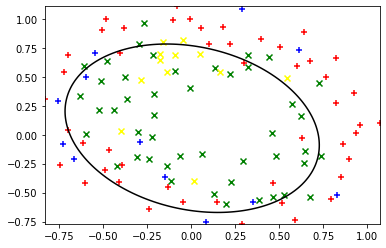

In [71]:
plot_data(X_train, y_train)
plot_data(X_test, y_test, True)
plot_surface(clf, X.iloc[:, 0], X.iloc[:, 1])